# CMPT 423/820
## Assignment 4 Question 4
* Solutions and Grading Scheme
* 12 marks

The ```a4q4.csv``` file contains a 6D dataset (each sample has 6 numeric features, one class label, and an index column).  It's too many dimensions to visualize directly.  

To complete this question:
1. Produce a scatter plot of any 2 dimensions.  Do you see any natural clusters in 2D?
1. Build a classifier (your choice, e.g., Naive Bayes, KNN, etc) using the 6 features and the label.  Get an estimate of the classifier performance using cross validation.
2. Use Principle Component Analysis to reduce the data to 2 principle components.  (look at the docs: sklearn.decomposition.PCA)
1. Produce a scatter plot of the 2 principle components.  Do you see any natural clusters?
1. Build a classifier (the same type you used above) using the 2 principle components and the label.  Get an estimate of the classifier performance using cross validation.
1. Report on the difference in classifier accuracy.


First some libraries...

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import decomposition
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier

### Step 1
The ```a4q2.csv``` file contains a 6D dataset (each sample has 6 numeric features, and one index).

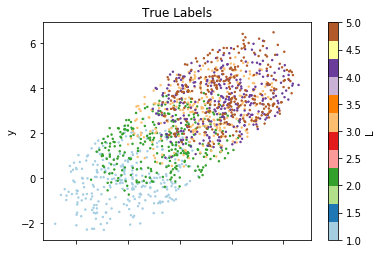

In [2]:
df = pd.read_csv('a4q4b.csv', index_col=0)

#Here we can choose a global colormap, to help visualization
# see https://matplotlib.org/tutorials/colors/colormaps.html
cmapstr = 'Paired'

# here we choose how big each point in the plot will be
ptsize = 2

df.plot.scatter(x='x', y='y', c='L',colormap=cmapstr,s=ptsize, title='True Labels')
plt.show()

It's obvious that the data sets overlap, but it's possible to see that there are some patterns: the light blue points are near the lower-left, but the red-brown points are only near the upper right.  In 2D, there are no clusters, but one might suspect that in higher dimensions, there may be clusters, if only we could get the right perspective.

### Step 2
We'll set up the data set and the labels, so we can apply the various processes.

In [3]:
X = df[['x','y','a','b','c','d']]
y = df['L']

### Step 3:  the classifier on the original data
Everyone's favorite: Naive Bayes!

In [4]:
clf1 = GaussianNB()
clf2 = GaussianNB()

scores = cross_val_score(clf1, X, y, cv=10)
print("GNB, orig: Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

GNB, orig: Accuracy: 0.92 (+/- 0.05)


Accuracy is already pretty good.

### Step 4: PCA
We'll apply PCA, looking for 2 principle components.  The primary reason to look for 2 is that we'd like to visualize the data.  For any other reason, we might choose a different number of components.
* The Scikit interface use the ```fit()``` method to do the analysis.
* To project the original 6D data onto the 2 principle components, we use the ```transform()``` method.  
* Scikit provides a convenience method ```fit_transform()``` that does both in one call.

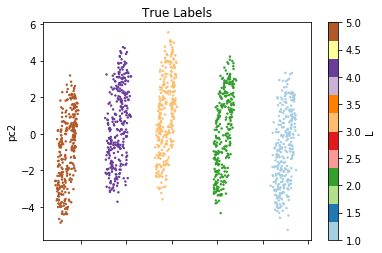

In [5]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)

pca_df = pca.transform(X)

# Now let's see the data projected onto the 2 components.
scatter_df = pd.DataFrame(pca_df,columns=['pc1','pc2'])
scatter_df['L'] = df['L']
scatter_df.plot.scatter(x='pc1', y='pc2', c='L',colormap=cmapstr,s=ptsize, title='True Labels')
plt.show()

This data looks too good to be true, and that's because I designed it to be like that.  Five neat clusters.  No classifier should have any trouble with this transformed data.

### Step 5: classifying the transformed data
Let's see what Naive Bayes has to say about this dataset.

In [6]:
scores = cross_val_score(clf2, pca_df, y, cv=10)
print("GNB, 2pca: Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


GNB, 2pca: Accuracy: 1.00 (+/- 0.00)


The data is so good that Naive Bayes makes zero error in 10-fold cross-validation.  This is a substantial improvement over the accuracy of 90% or so using the 6D dataset. 

# Grading:
1. 3 marks: You built a classifier using the whole dataset, and reported an accuracy value.
  * Full marks for any classifier and any accuracy results.
       * Naive Bayes: around 90% accuracy.
       * SVM (linear): around 90-100% accuracy.
       * KNN (k=11): around 100% accuracy.
         

1. 3 marks: You applied PCA, and visualized the first two principle components.
  * Full marks for calling PCA, and plotting the results.  
       * Nice neat clusters!  
        
1. 3 marks: You built a classifier using the first two principle components, and reported an accuracy value.
  * Full marks for any classifier and any accuracy results.
        * Naive Bayes: around 100% accuracy.
        * SVM (linear): around 90-100% accuracy.
        * KNN (k=11): around 100% accuracy.
        
1. 3 marks: You reported on the difference in accuracy between your two classifiers.
  * Full marks for a report that compared the two results, and made some attempt to interpret the results.
      * Naive Bayes: around 100% accuracy.  This was a little better than the 6D data.  This means that there are useful distinctions in the 6D data that are fairly effectively used by Naive Bayes.  The problem is that we can't see them in 6D.
      * SVM (linear): around 90-100% accuracy.  The accuracy didn't improve, but it also didn't get worse.  That means for this data we could base the classifier on the transformed data, meaning the classifier would be more efficient, and we would not lose any accuracy.
      * KNN (k=11): around 100% accuracy.  Using PCA represents an opportunity to build a simpler model using far fewer features, just as described for SVC.

All of these discussions show that the value of PCA depends on the data set, and the model being used for classification.



# Appendix -- Using other classifiers
For some perspective, I used several classifiers, just to collect the comments above.  Students are not expected or required to use several classifiers.

#### Support Vector Machines:

In [7]:
clf1 = SVC(kernel='linear')
clf2 = SVC(kernel='linear')

scores = cross_val_score(clf1, X, y, cv=10)
print("SVC, orig: Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf2, pca_df, y, cv=10)
print("SVC, 2pca: Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

SVC, orig: Accuracy: 1.00 (+/- 0.00)
SVC, 2pca: Accuracy: 1.00 (+/- 0.00)


The linear SVM was able to detect the planes that would separate the data.  These are not obvious in the visualization of ```a4q2b.csv``` in any two dimensions, but clearly available by SVM in the 6D space.

In [8]:
clf1 = LinearSVC(max_iter=5000)
clf2 = LinearSVC(max_iter=5000)

scores = cross_val_score(clf1, X, y, cv=10)
print("LinearSVC, orig: Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf2, pca_df, y, cv=10)
print("LinearSVC, 2pca: Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

LinearSVC, orig: Accuracy: 0.95 (+/- 0.03)
LinearSVC, 2pca: Accuracy: 0.90 (+/- 0.04)


The alternate implementation doesn't do as well as the more general SVC implementation, as a result of the specialization.  Not exactly sure why!  The PCA actually caused this version to do worse than the original 6D dataset.

#### K Nearest Neighbours
Because Naive Bayes showed some change, and SVC was more or less the same, I wanted another vote on the matter.

In [9]:
clf1 = KNeighborsClassifier(11)
clf2 = KNeighborsClassifier(11)

scores = cross_val_score(clf1, X, y, cv=5)
print("KNN, orig: Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf2, pca_df, y, cv=5)
print("KNN, 2pca: Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

KNN, orig: Accuracy: 1.00 (+/- 0.00)
KNN, 2pca: Accuracy: 1.00 (+/- 0.00)


KNN does equally well on 6D as on the 2 principle components from PCA.  This supports the idea that the ```a4q2b.csv``` data is well-separated in 6D even though we can't visualize it.  Using PCA makes the classifier simpler when all is said and done.  Because KNN stores data internally, storing 2D data is much better than storing 6D data, by a factor of 3.